# particleScanning
## Creating a virtual particle from a series of polar equidistant images
### Steps to virtualise a scanned particle
 - Initial image processing to find region of interest
 - Get the rotation angle from the number of images in series
 - Binarisation using Otsu thresholding
 - Volume reconstruction using extrusion of binary image series
 - Generate mesh for STL file production
 - profit??????

 ### Secondary objectives
 - Code should be of production quality, linear solutions, reproducable
 - Some error handling
 


## Initial processing of images
First, navigate to the folder where the particle images are located and generate a list of file names, find the region of interest

In [11]:
import os 
import sys
import glob
import matplotlib
from matplotlib import pyplot as plt
import cv2
for i in range(3):

# when script is run as file, use this to get the path used in command line input.
# for now, we'll use a discrete path for the purposes of jupyter

# pathName = sys.argv[1]
# if os.path.exists(pathName):
#     print os.path.basename(pathName)
#     # path exists

pathName = "/mnt/e/201217151405/"
if os.path.exists(pathName):
    print('Loading images from %s' % (pathName))
    imageFiles = glob.glob(pathName+'*.png')
    print(imageFiles[1])
else:
    print('Path name %s does not exist, exiting...' % (pathName))
    sys.exit(1)

img = cv2.imread(imageFiles[1])




Loading images from /mnt/e/201217151405/
/mnt/e/201217151405/201217151405_1.png


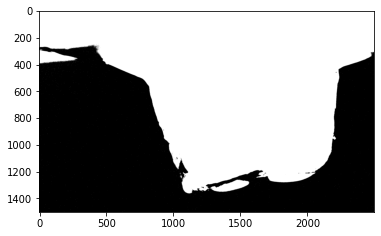

In [57]:
# Selecting the region of interest and binarisation

## develop a quick way to detect the vingette in the image and crop to the central area, for now use coordinates 
import numpy as np

particle = img[750:2250,1000:3500]

plt.imshow(particle)

# Otsu's thresholding
ret2,th2 = cv2.threshold(particle,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

ret3,th3 = cv2.threshold(particle,253,255,cv2.THRESH_BINARY_INV)

particle_thresh =  th2
plt.imshow(particle_thresh,'gray')
plt.imshow(th3,'gray')
